**Lab Assignment 10**

In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

**Question 1**

In [8]:
import re
from nltk.corpus import stopwords
from collections import Counter

text = "Books are magical portals to new worlds. Every time I read a novel, I experience different lives and adventures. The possibilities in books are endless, and they take you to new dimensions."
text_lower = re.sub(r'[^\w\s]', '', text.lower())
split_words = text_lower.split()
stop_words = set(stopwords.words('english'))
filtered_words_split = [w for w in split_words if w not in stop_words]

word_freq_split = Counter(filtered_words_split)

print("Word Frequency Distribution (Using split()):")
print(word_freq_split)

Word Frequency Distribution (Using split()):
Counter({'books': 2, 'new': 2, 'magical': 1, 'portals': 1, 'worlds': 1, 'every': 1, 'time': 1, 'read': 1, 'novel': 1, 'experience': 1, 'different': 1, 'lives': 1, 'adventures': 1, 'possibilities': 1, 'endless': 1, 'take': 1, 'dimensions': 1})


**Question 2**

In [9]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

text = "Books are magical portals to new worlds. Every time I read a novel, I experience different lives and adventures. The possibilities in books are endless, and they take you to new dimensions."
text_lower = re.sub(r'[^\w\s]', '', text.lower())
split_words = text_lower.split()

stop_words = set(stopwords.words('english'))
filtered_words_split = [w for w in split_words if w not in stop_words]

porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

stemmed_words_porter = [porter_stemmer.stem(w) for w in filtered_words_split]
stemmed_words_lancaster = [lancaster_stemmer.stem(w) for w in filtered_words_split]
lemmatized_words = [lemmatizer.lemmatize(w) for w in filtered_words_split]

print("Stemmed words (Porter):", stemmed_words_porter)
print("Stemmed words (Lancaster):", stemmed_words_lancaster)
print("Lemmatized words:", lemmatized_words)


Stemmed words (Porter): ['book', 'magic', 'portal', 'new', 'world', 'everi', 'time', 'read', 'novel', 'experi', 'differ', 'live', 'adventur', 'possibl', 'book', 'endless', 'take', 'new', 'dimens']
Stemmed words (Lancaster): ['book', 'mag', 'port', 'new', 'world', 'every', 'tim', 'read', 'novel', 'expery', 'diff', 'liv', 'adv', 'poss', 'book', 'endless', 'tak', 'new', 'dimend']
Lemmatized words: ['book', 'magical', 'portal', 'new', 'world', 'every', 'time', 'read', 'novel', 'experience', 'different', 'life', 'adventure', 'possibility', 'book', 'endless', 'take', 'new', 'dimension']


**Question 3**

In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

texts = [
    "Books are magical portals to new worlds.",
    "Every time I read a novel, I experience different lives and adventures.",
    "The possibilities in books are endless, and they take you to new dimensions."
]

count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

X_count = count_vectorizer.fit_transform(texts)
X_tfidf = tfidf_vectorizer.fit_transform(texts)

print("Bag of Words representation (CountVectorizer):")
print(count_vectorizer.get_feature_names_out())
print(X_count.toarray())

print("TF-IDF scores (TfidfVectorizer):")
print(tfidf_vectorizer.get_feature_names_out())
print(X_tfidf.toarray())


Bag of Words representation (CountVectorizer):
['adventures' 'and' 'are' 'books' 'different' 'dimensions' 'endless'
 'every' 'experience' 'in' 'lives' 'magical' 'new' 'novel' 'portals'
 'possibilities' 'read' 'take' 'the' 'they' 'time' 'to' 'worlds' 'you']
[[0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0]
 [1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0]
 [0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1]]
TF-IDF scores (TfidfVectorizer):
['adventures' 'and' 'are' 'books' 'different' 'dimensions' 'endless'
 'every' 'experience' 'in' 'lives' 'magical' 'new' 'novel' 'portals'
 'possibilities' 'read' 'take' 'the' 'they' 'time' 'to' 'worlds' 'you']
[[0.         0.         0.32992832 0.32992832 0.         0.
  0.         0.         0.         0.         0.         0.43381609
  0.32992832 0.         0.43381609 0.         0.         0.
  0.         0.         0.         0.32992832 0.43381609 0.        ]
 [0.34142622 0.25966344 0.         0.         0.34142622 0.
  0.         0.34142622 0.341

**Question 4**

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

text1 = "Artificial Intelligence is a branch of computer science that aims to create machines capable of intelligent behavior."
text2 = "Blockchain is a decentralized digital ledger technology that ensures secure and transparent transactions."

texts = [text1, text2]

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])

set1 = set(text1.lower().split())
set2 = set(text2.lower().split())
jaccard_sim = len(set1 & set2) / len(set1 | set2)

print("Jaccard Similarity:", jaccard_sim)
print("Cosine Similarity:", cosine_sim[0][0])


Jaccard Similarity: 0.11538461538461539
Cosine Similarity: 0.07397129483465995


**Question 5**

Polarity: 0.4533333333333333
Subjectivity: 0.7466666666666667
Sentiment Class: Positive


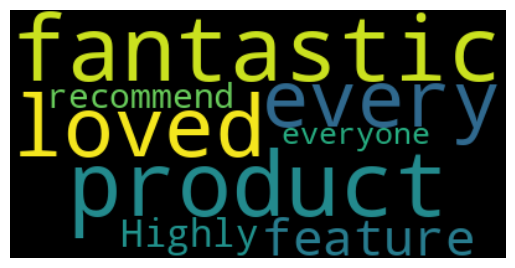

In [14]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = "This is a fantastic product! I loved every feature of it. Highly recommend it to everyone."

blob = TextBlob(text)
sentiment = blob.sentiment

print("Polarity:", sentiment.polarity)
print("Subjectivity:", sentiment.subjectivity)

if sentiment.polarity > 0:
    sentiment_class = "Positive"
elif sentiment.polarity < 0:
    sentiment_class = "Negative"
else:
    sentiment_class = "Neutral"

print("Sentiment Class:", sentiment_class)

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [16]:
!pip install keras

**Question 6**

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

import numpy as np

text = "Books open up a world of imagination and creativity. They take us to places we’ve never been before."

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
sequences = tokenizer.texts_to_sequences([text])

max_sequence_length = 10
X = pad_sequences(sequences, maxlen=max_sequence_length)

model = Sequential()
model.add(Embedding(input_dim=100, output_dim=10, input_length=max_sequence_length))
model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X, np.array([1]), epochs=5)

seed_text = "Books"
predicted_text = model.predict(X)

print("Predicted Text:", predicted_text)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.0000e+00 - loss: 0.6940
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 1.0000 - loss: 0.6880
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 0.6819
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 1.0000 - loss: 0.6757
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 1.0000 - loss: 0.6693
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
Predicted Text: [[0.51557815]]
